In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [ ]:
df = pd.read_csv('/archive (2).zip')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
data = df.values
X = data[:,0:4]
Y = data[:,4]

In [ ]:
df.columns


Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)


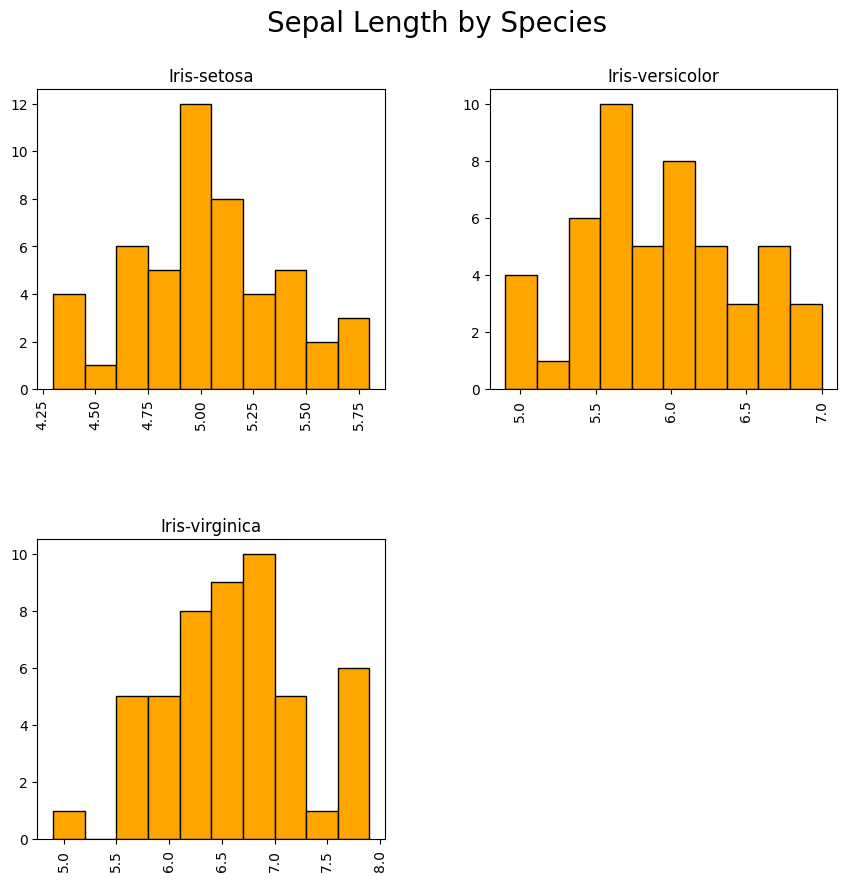

In [ ]:
df.hist(column='SepalLengthCm', by='Species', figsize=(10, 10), color='orange', edgecolor='black')
plt.suptitle('Sepal Length by Species', fontsize=20)
plt.xlabel('Length', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

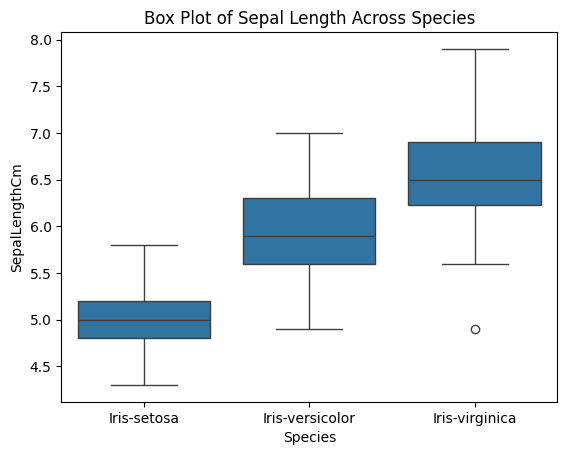

In [ ]:
sns.boxplot(x='Species', y='SepalLengthCm', data=df)
plt.title('Box Plot of Sepal Length Across Species')
plt.show()

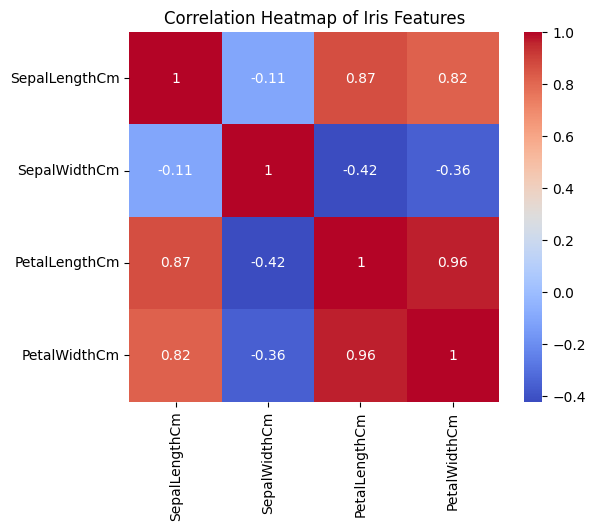

In [ ]:
numeric_df = df.drop(['Species'], axis=1)
correlation_matrix =numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Iris Features')
plt.show()

In [ ]:
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
iris = load_iris()
X, y = iris.data, iris.target


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:

model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=1)



Epoch 1/50
4/4 [==============================] - 1s 5ms/step - loss: 0.9059 - accuracy: 0.6917
Epoch 2/50
4/4 [==============================] - 0s 5ms/step - loss: 0.8791 - accuracy: 0.7000
Epoch 3/50
4/4 [==============================] - 0s 5ms/step - loss: 0.8523 - accuracy: 0.7250
Epoch 4/50
4/4 [==============================] - 0s 6ms/step - loss: 0.8267 - accuracy: 0.7333
Epoch 5/50
4/4 [==============================] - 0s 5ms/step - loss: 0.8028 - accuracy: 0.7500
Epoch 6/50
4/4 [==============================] - 0s 5ms/step - loss: 0.7789 - accuracy: 0.7667
Epoch 7/50
4/4 [==============================] - 0s 5ms/step - loss: 0.7548 - accuracy: 0.7833
Epoch 8/50
4/4 [==============================] - 0s 5ms/step - loss: 0.7325 - accuracy: 0.7833
Epoch 9/50
4/4 [==============================] - 0s 4ms/step - loss: 0.7101 - accuracy: 0.7833
Epoch 10/50
4/4 [==============================] - 0s 5ms/step - loss: 0.6887 - accuracy: 0.7833
Epoch 11/50
4/4 [======================

In [ ]:

test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test accuracy:", test_accuracy)



1/1 [==============================] - 0s 158ms/step - loss: 0.2764 - accuracy: 0.9000
Test accuracy: 0.8999999761581421


In [ ]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64